<a href="https://colab.research.google.com/github/YuriSerhiienko/data_science_hw6/blob/main/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!gdown 1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6 -O data.zip
!unzip data.zip
data_2d = pd.read_csv('data/data_2d.csv')
mnist = pd.read_csv('data/mnist.csv')

Downloading...
From: https://drive.google.com/uc?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6
To: /content/data.zip
100% 116k/116k [00:00<00:00, 119MB/s]
Archive:  data.zip
  inflating: data/data_2d.csv        
  inflating: data/mnist.csv          


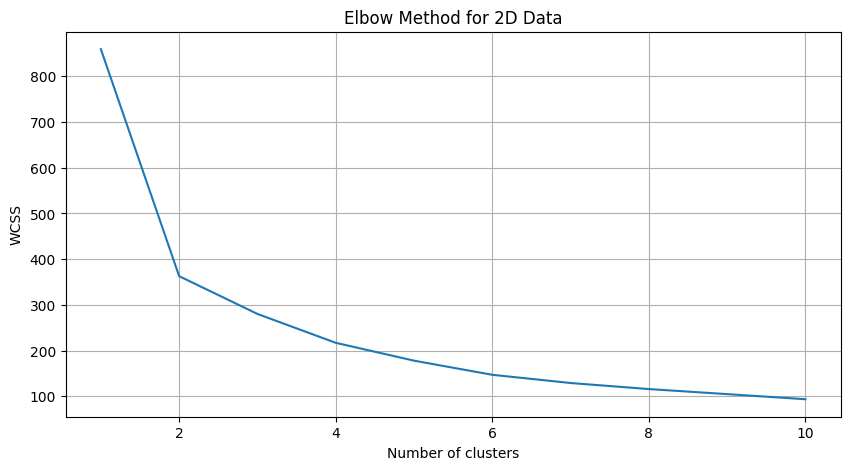

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Функція для визначення оптимальної кількості кластерів (метод ліктя)
def elbow_method(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method for 2D Data')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

# Використовуємо метод ліктя для датасету data_2d
elbow_method(data_2d)

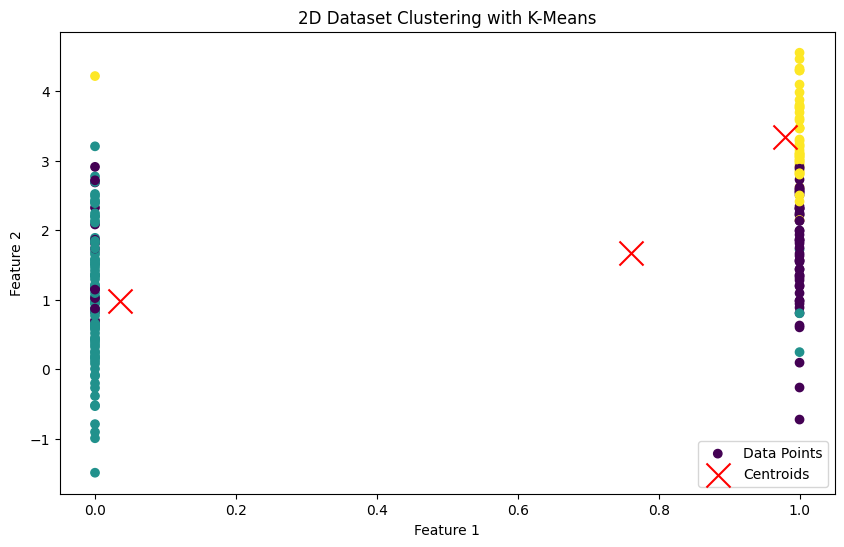

In [6]:
# Кластеризація 2D датасету з використанням K-means
kmeans_2d = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters_2d = kmeans_2d.fit_predict(data_2d)

# Візуалізація результатів кластеризації
plt.figure(figsize=(10, 6))
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=clusters_2d, cmap='viridis', marker='o', label='Data Points')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('2D Dataset Clustering with K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

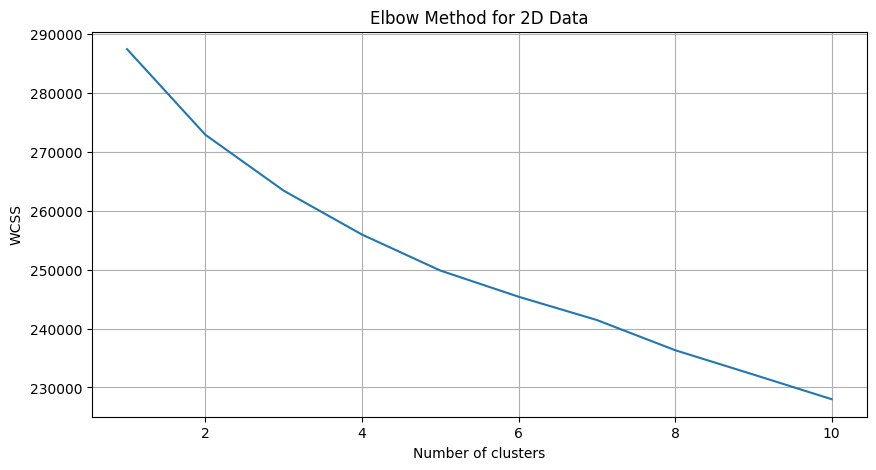

In [8]:
from sklearn.preprocessing import StandardScaler
# Нормалізація датасету MNIST перед використанням методу ліктя
mnist_norm = StandardScaler().fit_transform(mnist)

# Використовуємо метод ліктя для датасету MNIST
elbow_method(mnist_norm)

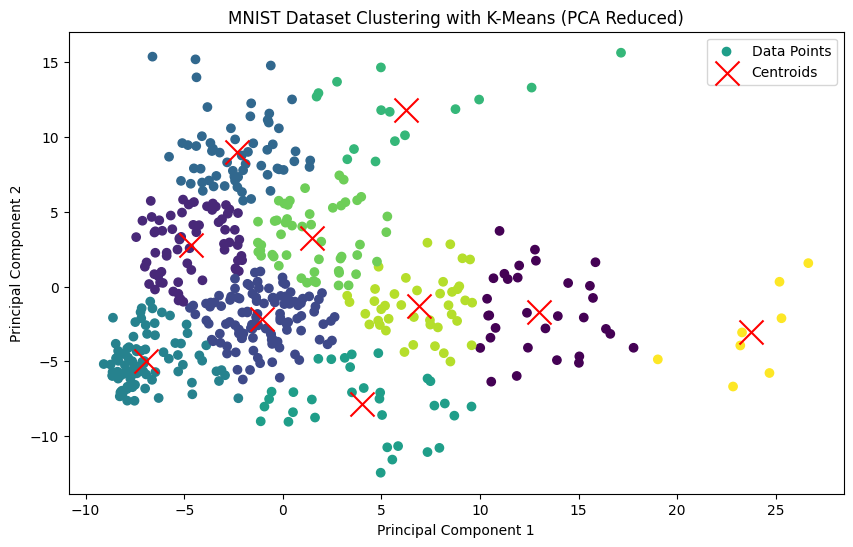

In [9]:
from sklearn.decomposition import PCA
# Нормалізація датасету MNIST
mnist_norm = StandardScaler().fit_transform(mnist)

# Зменшення розмірності MNIST датасету до 2 вимірів за допомогою PCA
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_norm)

# Кластеризація зменшеного датасету MNIST з використанням K-means
kmeans_mnist = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)
mnist_clusters = kmeans_mnist.fit_predict(mnist_pca)

# Візуалізація результатів кластеризації
plt.figure(figsize=(10, 6))
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_clusters, cmap='viridis', marker='o', label='Data Points')
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('MNIST Dataset Clustering with K-Means (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()